<center><font size='6'><b>Solution of Homework 3</b></font></center>
<p>
<center><font size='4'><b>HSE 545: Machine Learning</b></font></center>

<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 80% style="border-style: hidden; border-collapse: collapse;">
             
        </td>
        <td width = 16%>
            by Seungchul Lee
        </td>
    </tr>
</table>


# Problem 1
I have demonstrated the PCA algorithm using video recordings of a spring and mass system. Figure 1 shows PCA results which you can find by running ‘`spring_PCA.m`’. 

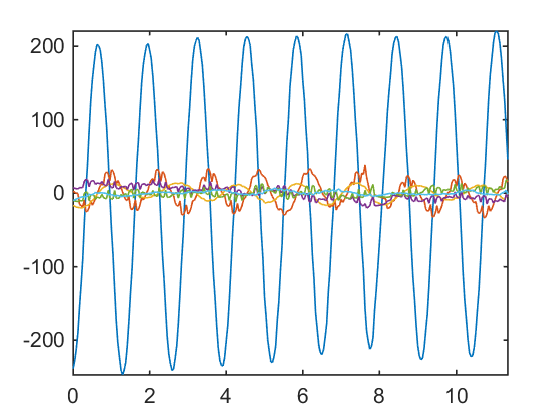

In [23]:
% spring_PCA.m
%% PCA: Multiple Video Records of Spring and Mass System 

%% Read Video Files
load([pwd,'\image_files\camera_recording.mat'])
X = pos_data;

%% PCA
[n,m] = size(X);
Xbar = mean(X,2);           % compute mean for each row
X = X - repmat(Xbar,1,m);   % subtract mean

S = 1/(m-1)*X*X';           % covariance matrix

[U,D] = eig(S);             % eigenvectors and eigenvalues
[d,I] = sort(diag(D),'descend');
U = U(:,I);

% produce the principal components projection (coordinate changes in U)
Z = U'*X; 

xpt = (0:m-1)*1/24; 
plot(xpt,Z), axis tight

I want you to create the same results using SVD in this problem. Use the provided template ‘`spring_SVD.m`’ to complete it.

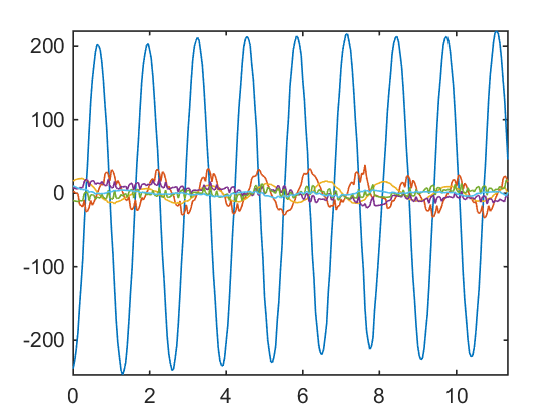

In [29]:
% spring_SVD.m

%% Read Video Files
load([pwd,'\image_files\camera_recording.mat'])
X = pos_data;

%% SVD
[n,m] = size(X);
Xbar = mean(X,2);           % compute mean for each row
X = X - repmat(Xbar,1,m);   % subtract mean

%% here write a code for SVD
[U,S,V] = svd(X',0);

Z = V'*X;

xpt = (0:m-1)*1/24; 
plot(xpt,Z), axis tight, box on

# Problem 2 (Handwritten Digit Recognition)

Using MATLAB, do the following handwritten digit recognition experiments.

### (a)
Download the handwritten digit database (`'usps.mat'`) from the dropbox. Then, load this file into your PC. This file contains 4 arrays: 

- `train_patterns` `(256` $\times$ `4649)`
- `test_patterns` `(256` $\times$ `4649)`
- `train_labels` `(10` $\times$ `4649)`
- `test_labels` `(10` $\times$ `4649)`

The `train_patterns` and `test_patterns` contain a raster scan of the 16 $\times$ 16 gray level pixel intensities, which have been normalized to range within [-1,1]. The `train_labels` and `test_labels` variables contain the ground truth information of the digit images. That is, if the $j$th handwritten digit image in `train_patterns` truly represents digit $i$, then the ($i+1,j$)th entry of `train_labels` is $+1$, and all the other entries of the $j$th column of train labels are $-1$.

Now, display the first 16 images in `train_patterns` using `subplot(4,4,k)` and `imagesc` functions with `colormap(gray)` in MATLAB. Print out the figure and attach it to your submission.

Hint: You need to reshape each column into a matrix of size 16 $\times$ 16.

`>> reshape(train_patterns(:,k),[16,16])`



In [1]:
load([pwd,'\image_files\usps.mat'])
whos

Name                  Size                Bytes  Class     Attributes

  test_labels          10x4649             371920  double              
  test_patterns       256x4649            9521152  double              
  train_labels         10x4649             371920  double              
  train_patterns      256x4649            9521152  double

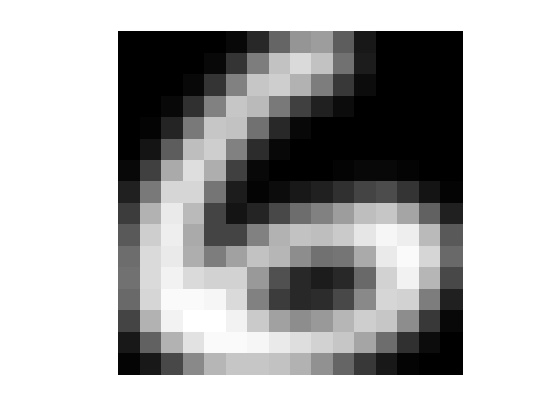

ans =

    -1
    -1
    -1
    -1
    -1
    -1
     1
    -1
    -1
    -1

In [2]:
train_labels(:,1)
A = reshape(train_patterns(:,1),[16,16]);
imagesc(A), colormap(gray), axis image, axis off

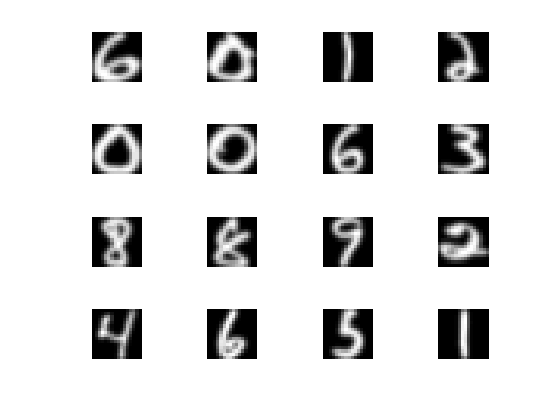

In [3]:
% plot some digits
for k = 1:16
    A = reshape(train_patterns(:,k),[16,16]);
    subplot(4,4,k)
    imagesc(A), colormap(gray), axis image, axis off
end

### (b)

Now, compute the mean (average) digits in the train patterns, put them in a matrix called `train_avg` of size 256 $\times$ 10, and display these 10 mean digit images using `subplot(2,5,k)` and `imagesc`. Print out the figure and attach it to your submission.

Hint: You can gather (or pool) all the images in `train_patterns` corresponding to digit $k-1 (1\leq k\leq 10)$ by the following:

`>> train_patterns(:,train_labels(k,:) == 1)`

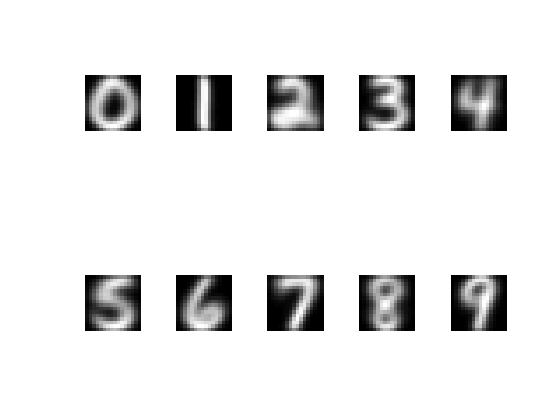

In [4]:
train_avg = zeros(16*16,10);

for k = 1:10
    train_avg(:,k) = mean(train_patterns(:,train_labels(k,:) == 1),2);
    A = reshape(train_avg(:,k),[16,16]);
    subplot(2,5,k)
    imagesc(A), colormap(gray), axis image, axis off
end

### (c)
Let’s conduct the simplest classification experiments as follows:


First, prepare a matrix called `test_classification` of size 10 $\times$ 4649 and fill this matrix by computing the Euclidean distance (or its square) between each image in the `test_patterns` and each mean digit image in `train_patterns`.

Hint: the following line computes the squared Euclidean distances between all the test digit images and the $k$th mean digit of the training dataset by one line:

`>> sum((test_patterns - repmat(train_avg(:,k),[1 4649])).^2)`

Then, compute the classification results by finding the position index of the minimum of each column of `test_classification`. Put the results in a vector `test_classified` of size 1 $\times$ 4649. 

Hint: You can find the position index giving the minimum of the $j$th column of `test_classification` by

`>> [tmp, test_classified] = min(test_classification,[],1)`

In [5]:
test_classification = zeros(10,4649);

for k = 1:10
    test_classification(k,:) = sum((test_patterns - repmat(train_avg(:,k),[1,4649])).^2);
end

[~, test_classified] = min(test_classification,[],1);

Finally, compute the confusion matrix `confusion_matrix` of size 10 $\times$ 10, print out this matrix, and submit your results.

Hint: First gather the classification results corresponding to the $k$th digit by 

`>> tmp = test_classified(test_labels(k,:) == 1)`

This `tmp` array contains the results of your classification of the test digits whose true digit is $k-1 (1\leq k\leq 10)$. In other words, if your classification results were perfect, all the entries of tmp would be $k$. But in reality, this simplest classification algorithm makes mistakes, so `tmp` contains values other than $k$. You need to count how many entries have the value $j$ in `tmp, j=1:10` . That would give you the $k$th row of the `confusion_matrix`.

__Confusion matrix__ : If a classification system has been trained to distinguish between cats, dogs and rabbits, a confusion matrix will summarize the results of testing the algorithm for further inspection. Assuming a sample of 27 animals: 8 cats, 6 dogs, and 13 rabbits, the resulting confusion matrix could look like the table below:

<img src="./image_files/confusion_matrix.png" width=250>

In [6]:
confusion_matrix = zeros(10,10);
for k = 1:10
    tmp = test_classified(test_labels(k,:) == 1);
    for j = 1:10
        confusion_matrix(k,j) = sum((tmp == j));
    end
end
confusion_matrix

confusion_matrix =

   656     1     3     4    10    19    73     2    17     1
     0   644     0     1     0     0     1     0     1     0
    14     4   362    13    25     5     4     9    18     0
     1     3     4   368     1    17     0     3    14     7
     3    16     6     0   363     1     8     1     5    40
    13     3     3    20    14   271     9     0    16     6
    23    11    13     0     9     3   354     0     1     0
     0     5     1     0     7     1     0   351     3    34
     9    19     5    12     6     6     0     1   253    20
     1    15     0     1    39     2     0    24     3   314

# Problem 3

Let’s conduct the SVD-based classification experiments with the same data set in Problem 2.

### (d)
Pool all the images corresponding to the $k$th digit `train_patterns`, compute the rank 17 SVD of that set of images (_i.e._, the first 17 singular values and vectors), and put the left singular vectors (or the matrix $U$) of $k$th digit into the array $u$ of size 256 $\times$ 17 $\times$ 10. For `k = 1:10`, you can do the following:

`>> [u(:,:,k),tmp_s, tmp_v] = svds(train_patterns(:,train_labels(k,:) == 1),17);`

We do not need the singular values and right singular vectors in this experiment.



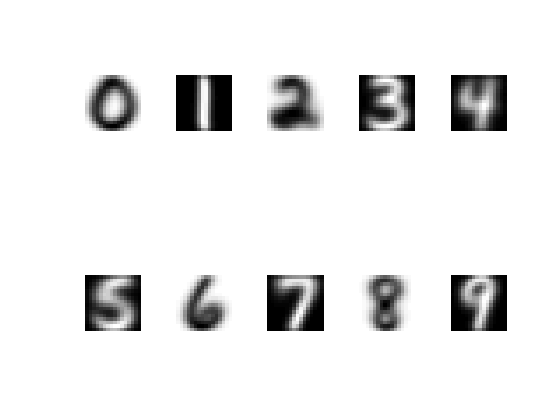

In [7]:
u = zeros(256,17,10);
for k = 1:10
    [u(:,:,k),tmp_s,tmp_v] = svds(train_patterns(:,train_labels(k,:) == 1),17);
    A = reshape(u(:,1,k),[16,16]);  % first mode out of 17
    subplot(2,5,k)
    imagesc(A), colormap(gray), axis image, axis off
end

### (e)

Now, compute the expansion coefficients of each test digit image with respect to the 17 singular vectors of each train digit image set. In other words, you need to compute 17 $\times$ 10 numbers for each test digit image. Next, compute the error between each original test digit image and its rank 17 approximation using the $k$th digit images in the training dataset. The idea of this classification is that if a test digit image should belong to class of $k$th digit if the corresponding rank 17 approximation is the best approximation (_i.e._, the smallest error) among 10 such approximations. Prepare a matrix `test_classification` of size 10 $\times$ 4649, and put those approximation errors into this matrix.

Hint: The rank 17 approximation of test digits using the 17 left singular vectors of the $k$th digit training images can be computed by 

`>> test_classification(k,:) = sum((test_patterns - u(:,:,k)*(u(:,:,k)'*test_patterns)).^2);`


In [11]:
test_classification = zeros(10,4649);

for k = 1:10
    test_classification(k,:) = sum((test_patterns - u(:,:,k)*(u(:,:,k)'*test_patterns)).^2);
end
[~, test_classified] = min(test_classification,[],1);

## (f)

Finally, compute the confusion matrix using this SVD-based classification method by following the same strategy as Parts (c) above. Let’s name this confusion matrix `confusion_matrix`. Print out this matrix, and submit your results.

In [12]:
confusion_matrix = zeros(10,10);
for i = 1:10
    tmp = test_classified(test_labels(i,:) == 1);
    for k = 1:10
        confusion_matrix(i,k) = sum((tmp == k));
    end
end
confusion_matrix

confusion_matrix =

   772     2     1     3     1     1     2     1     3     0
     0   646     0     0     0     0     0     0     0     1
     3     6   431     6     0     3     1     2     2     0
     1     1     4   401     0     7     0     0     4     0
     2     8     1     0   424     1     1     5     0     1
     2     0     0     5     2   335     7     1     1     2
     6     4     0     0     2     3   399     0     0     0
     0     2     0     0     2     0     0   387     0    11
     2     9     1     5     1     1     0     0   309     3
     0     5     0     1     0     0     0     4     1   388